In [8]:
# Import things
%matplotlib inline
import matplotlib
#matplotlib.use('Agg')

import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pandas as pd
from matplotlib import rcParams
import os
import glob
from scipy import io

import sys
sys.path.append('/Users/heather/ICECAPS-ACE/DataParse/')

from ace_parse import *
from utils import * 

# Supress warnings for sake of log file
import warnings
warnings.filterwarnings("ignore")

# Plotting preferences

rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams.update({'font.size': 14}) 
rcParams['axes.titlepad'] = 14 
rcParams['xtick.major.pad']='10'
rcParams['ytick.major.pad']='10'
myFmt = md.DateFormatter('%H/%d')
rule = md.HourLocator(interval=12)

In [9]:
# Get met data

dloc = '/Volumes/Data/ICECAPSarchive/Summit_Met/'
years = ['2019']
months = ['08']

met=pd.DataFrame()

for year in years:
    for month in months:
        w_dloc = '/Volumes/Data/ICECAPSarchive/Summit_Met/met_sum_insitu_1_obop_minute_%s_%s.txt'%(year,month)
        met = met.append(get_NOAA_met(w_dloc))



In [20]:
# Wind chill
#windchill = 13.12+ 0.6215 Ta - 11.37 v^{+0.16} + 0.3965 Ta v^{+0.16}}
# v = 10m wind speed in km/hour
# T = temperature in C

# wind speed m/s to km/h

v = met['ws'] * 3.6
met['WC'] = 13.12 + 0.6215 * met['T'] - 11.37 * v**0.16 + 0.3965 * met['T'] * v**0.16

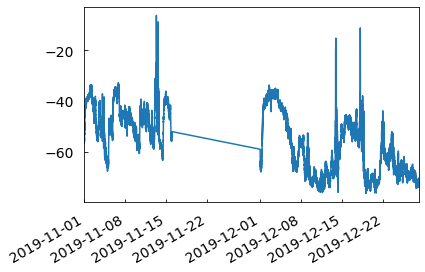

In [21]:
met['WC'].plot()

In [24]:
met[met['WC']<-76]

,wd,ws,pres,T,RH,WC
2019-12-19 00:15:00,53.0,8.4,669.33,-53.3,65,-76.087828
2019-12-19 00:16:00,54.0,8.1,669.33,-53.7,65,-76.283108
2019-12-19 00:27:00,53.0,9.0,669.29,-52.8,58,-76.053727
2019-12-20 12:20:00,80.0,7.2,666.85,-54.3,61,-76.010496
2019-12-20 12:21:00,81.0,7.2,666.85,-54.3,60,-76.010496
2019-12-20 18:14:00,66.0,10.2,664.82,-52.0,60,-76.131976


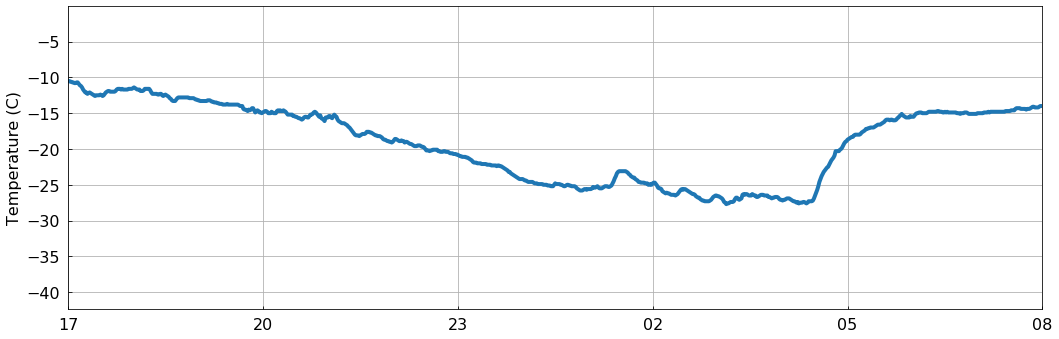

In [10]:
from matplotlib import rcParams
# Plotting preferences:
rcParams['xtick.direction'] = 'in'
rcParams['ytick.direction'] = 'in'
rcParams.update({'font.size': 16}) 
rcParams['axes.titlepad'] = 16 
rcParams['xtick.major.pad']='8'
rcParams['ytick.major.pad']='8'

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(met.index,met['T'], label='T',lw=4)   
#ax.set_ylim(0.01,500000)
ax.set_ylabel('Temperature (C)')
#ax.set_title('QCd Total Particle Counts: %s'%((dt.datetime.strftime(d1,'%Y-%m-%d')+' to '+dt.datetime.strftime(d2,'%Y-%m-%d'))))

ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
#ax.xaxis.set_major_locator(md.DayLocator(bymonthday=1))
ax.xaxis.set_major_locator(md.HourLocator(interval=3))


# Plot low aerosol line
#ax.axhline(10,c='tab:orange',ls='--',lw=3,alpha=0.6,label='10 c/cm3')
#ax.axhline(1,c='tab:orange',ls='-',lw=3,alpha=0.6,label='1 c/cm3')
#ax.axhline(np.mean(cpc_qc['c/cm3']),c='grey',ls='-',lw=2,alpha=0.6,label='mean: %s'%np.mean(cpc_qc['c/cm3']))

d1 = dt.datetime(2019,8,9,17,0)
d2 = dt.datetime(2019,8,10,8,0)
ax.set_xlim(d1,d2)
#ax.legend(loc='best',fontsize=10)
fig.tight_layout()
#fig.savefig(d_loc + 'Ncounts_current.png')

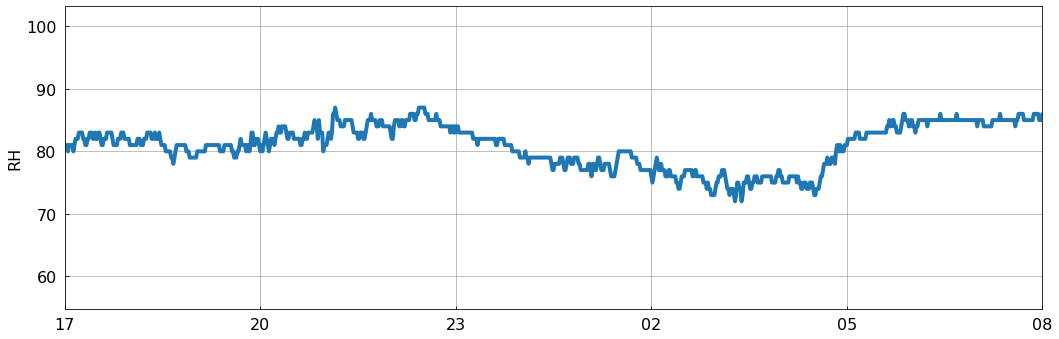

In [11]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
ax.grid(True)
ax.plot(met.index,met['RH'], label='RH',lw=4)   
#ax.set_ylim(0.01,500000)
ax.set_ylabel('RH')
#ax.set_title('QCd Total Particle Counts: %s'%((dt.datetime.strftime(d1,'%Y-%m-%d')+' to '+dt.datetime.strftime(d2,'%Y-%m-%d'))))

ax.xaxis.set_major_formatter(md.DateFormatter('%H'))
#ax.xaxis.set_major_locator(md.DayLocator(bymonthday=1))
ax.xaxis.set_major_locator(md.HourLocator(interval=))


# Plot low aerosol line
#ax.axhline(10,c='tab:orange',ls='--',lw=3,alpha=0.6,label='10 c/cm3')
#ax.axhline(1,c='tab:orange',ls='-',lw=3,alpha=0.6,label='1 c/cm3')
#ax.axhline(np.mean(cpc_qc['c/cm3']),c='grey',ls='-',lw=2,alpha=0.6,label='mean: %s'%np.mean(cpc_qc['c/cm3']))

d1 = dt.datetime(2019,8,9,17,0)
d2 = dt.datetime(2019,8,10,8,0)
ax.set_xlim(d1,d2)
#ax.legend(loc='best',fontsize=10)
fig.tight_layout()
#fig.savefig(d_loc + 'Ncounts_current.png')